# House Price Prediction - Upgrad Assignment

## Problem Statement:

    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

    The company wants to know: 
    - Which variables are significant in predicting the price of a house.
    - How well those variables describe the price of a house.

### Objective:
    I am required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Libraries

In [279]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing 

# Import warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [280]:
house_price = pd.read_csv('train.csv')

In [281]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [282]:
house_price.shape

(1460, 81)

In [283]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [284]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- There are null values present in few columns

In [285]:
#lets find some duplicates in dataset
sum(house_price.duplicated(subset='Id'))==0

True

- This concludes that there are no duplicates in the dataset.

### Missing Data

In [286]:
#Lets check for NaN valuse in the dataset
house_price.isnull().values.any()

True

In [287]:
house_price.isnull().values.sum()

7829

In [288]:
#checking NA columnwise
missing_values=(house_price.isnull().sum()).sort_values(ascending=False)
missing_values

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

#### Checking the dataset for the amount of nulls present

In [289]:
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
MasVnrType      0.60
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrArea      0.01
dtype: float64

#### Considering Thershld of 10% ; Dropping the column having more than the threshold range

In [290]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
MasVnrType     0.60
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [291]:
house_price = house_price.drop(['LotFrontage','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

#### Checking the columns where the missing values between 0 - 10%

In [292]:
#checking NA columnwise
missing_values=(house_price.isnull().sum()).sort_values(ascending=False)
missing_values

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSSubClass       0
SalePrice        0
Length: 74, dtype: int64

In [293]:
#exact list of columns with missing values
missing_columns=missing_values[missing_values>0]
missing_columns

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
Electrical       1
dtype: int64

In [294]:
print('Total no. of columns with missing values: ',missing_columns.count())

Total no. of columns with missing values:  12


### Imputing missing value

In [295]:
house_price['GarageType'].fillna('No Garage', inplace=True)
house_price['GarageCond'].fillna('No Garage', inplace=True)
house_price['GarageFinish'].fillna('No Garage', inplace=True)
house_price['GarageQual'].fillna('No Garage', inplace=True)
house_price['BsmtExposure'].fillna('No Basement', inplace=True)
house_price['BsmtFinType2'].fillna('No Basement', inplace=True)
house_price['BsmtFinType1'].fillna('No Basement', inplace=True)
house_price['BsmtCond'].fillna('No Basement', inplace=True)
house_price['BsmtQual'].fillna('No Basement', inplace=True)
house_price['MasVnrArea'].fillna(house_price.MasVnrArea.mean(), inplace=True)
house_price['Electrical'].fillna('Mix', inplace=True)

In [296]:
# Lets drop some more unimportant columns from the dataset based on the dictionary of dataset
house_price.drop('GarageYrBlt',axis=1,inplace=True)

In [297]:
house_price.drop('Id',axis=1,inplace=True)

In [298]:
#check again the shape of Dataframe
house_price.shape

(1460, 72)

In [299]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [300]:
# checking of numerical variables
house_price._get_numeric_data().columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [301]:
# There are some variables that should be in categorical
house_price['MSSubClass']=house_price['MSSubClass'].astype('object')
house_price['OverallQual']=house_price['OverallQual'].astype('object')
house_price['OverallCond']=house_price['OverallCond'].astype('object')
house_price['MoSold']=house_price['MoSold'].astype('object')
house_price['YrSold']=house_price['YrSold'].astype('object')
house_price['YearBuilt']=house_price['YearBuilt'].astype('object')
house_price['YearRemodAdd']=house_price['YearRemodAdd'].astype('object')

In [302]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  YearBuilt      1460 non-null   object 
 17  YearRemodAdd   1460 non-null   object 
 18  RoofStyl

In [303]:
house_price.describe()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,9981.264932,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


### Creating new Features in predicting housing prices

In [304]:
# Lets create total number of bathrooms in a house
house_price['Total Bathrooms']=((house_price['BsmtFullBath'])+(house_price['FullBath'])+(house_price['BsmtHalfBath']/2)+(house_price['HalfBath']/2))

In [305]:
# Lets get total surface area of house
house_price['Total SF']=(house_price['TotalBsmtSF']
                       +house_price['1stFlrSF']+house_price['2ndFlrSF'])

In [306]:
house_price.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total Bathrooms,Total SF
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,2,2008,WD,Normal,208500,3.5,2566
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,5,2007,WD,Normal,181500,2.5,2524
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,9,2008,WD,Normal,223500,3.5,2706
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,2,2006,WD,Abnorml,140000,2.0,2473
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,12,2008,WD,Normal,250000,3.5,3343


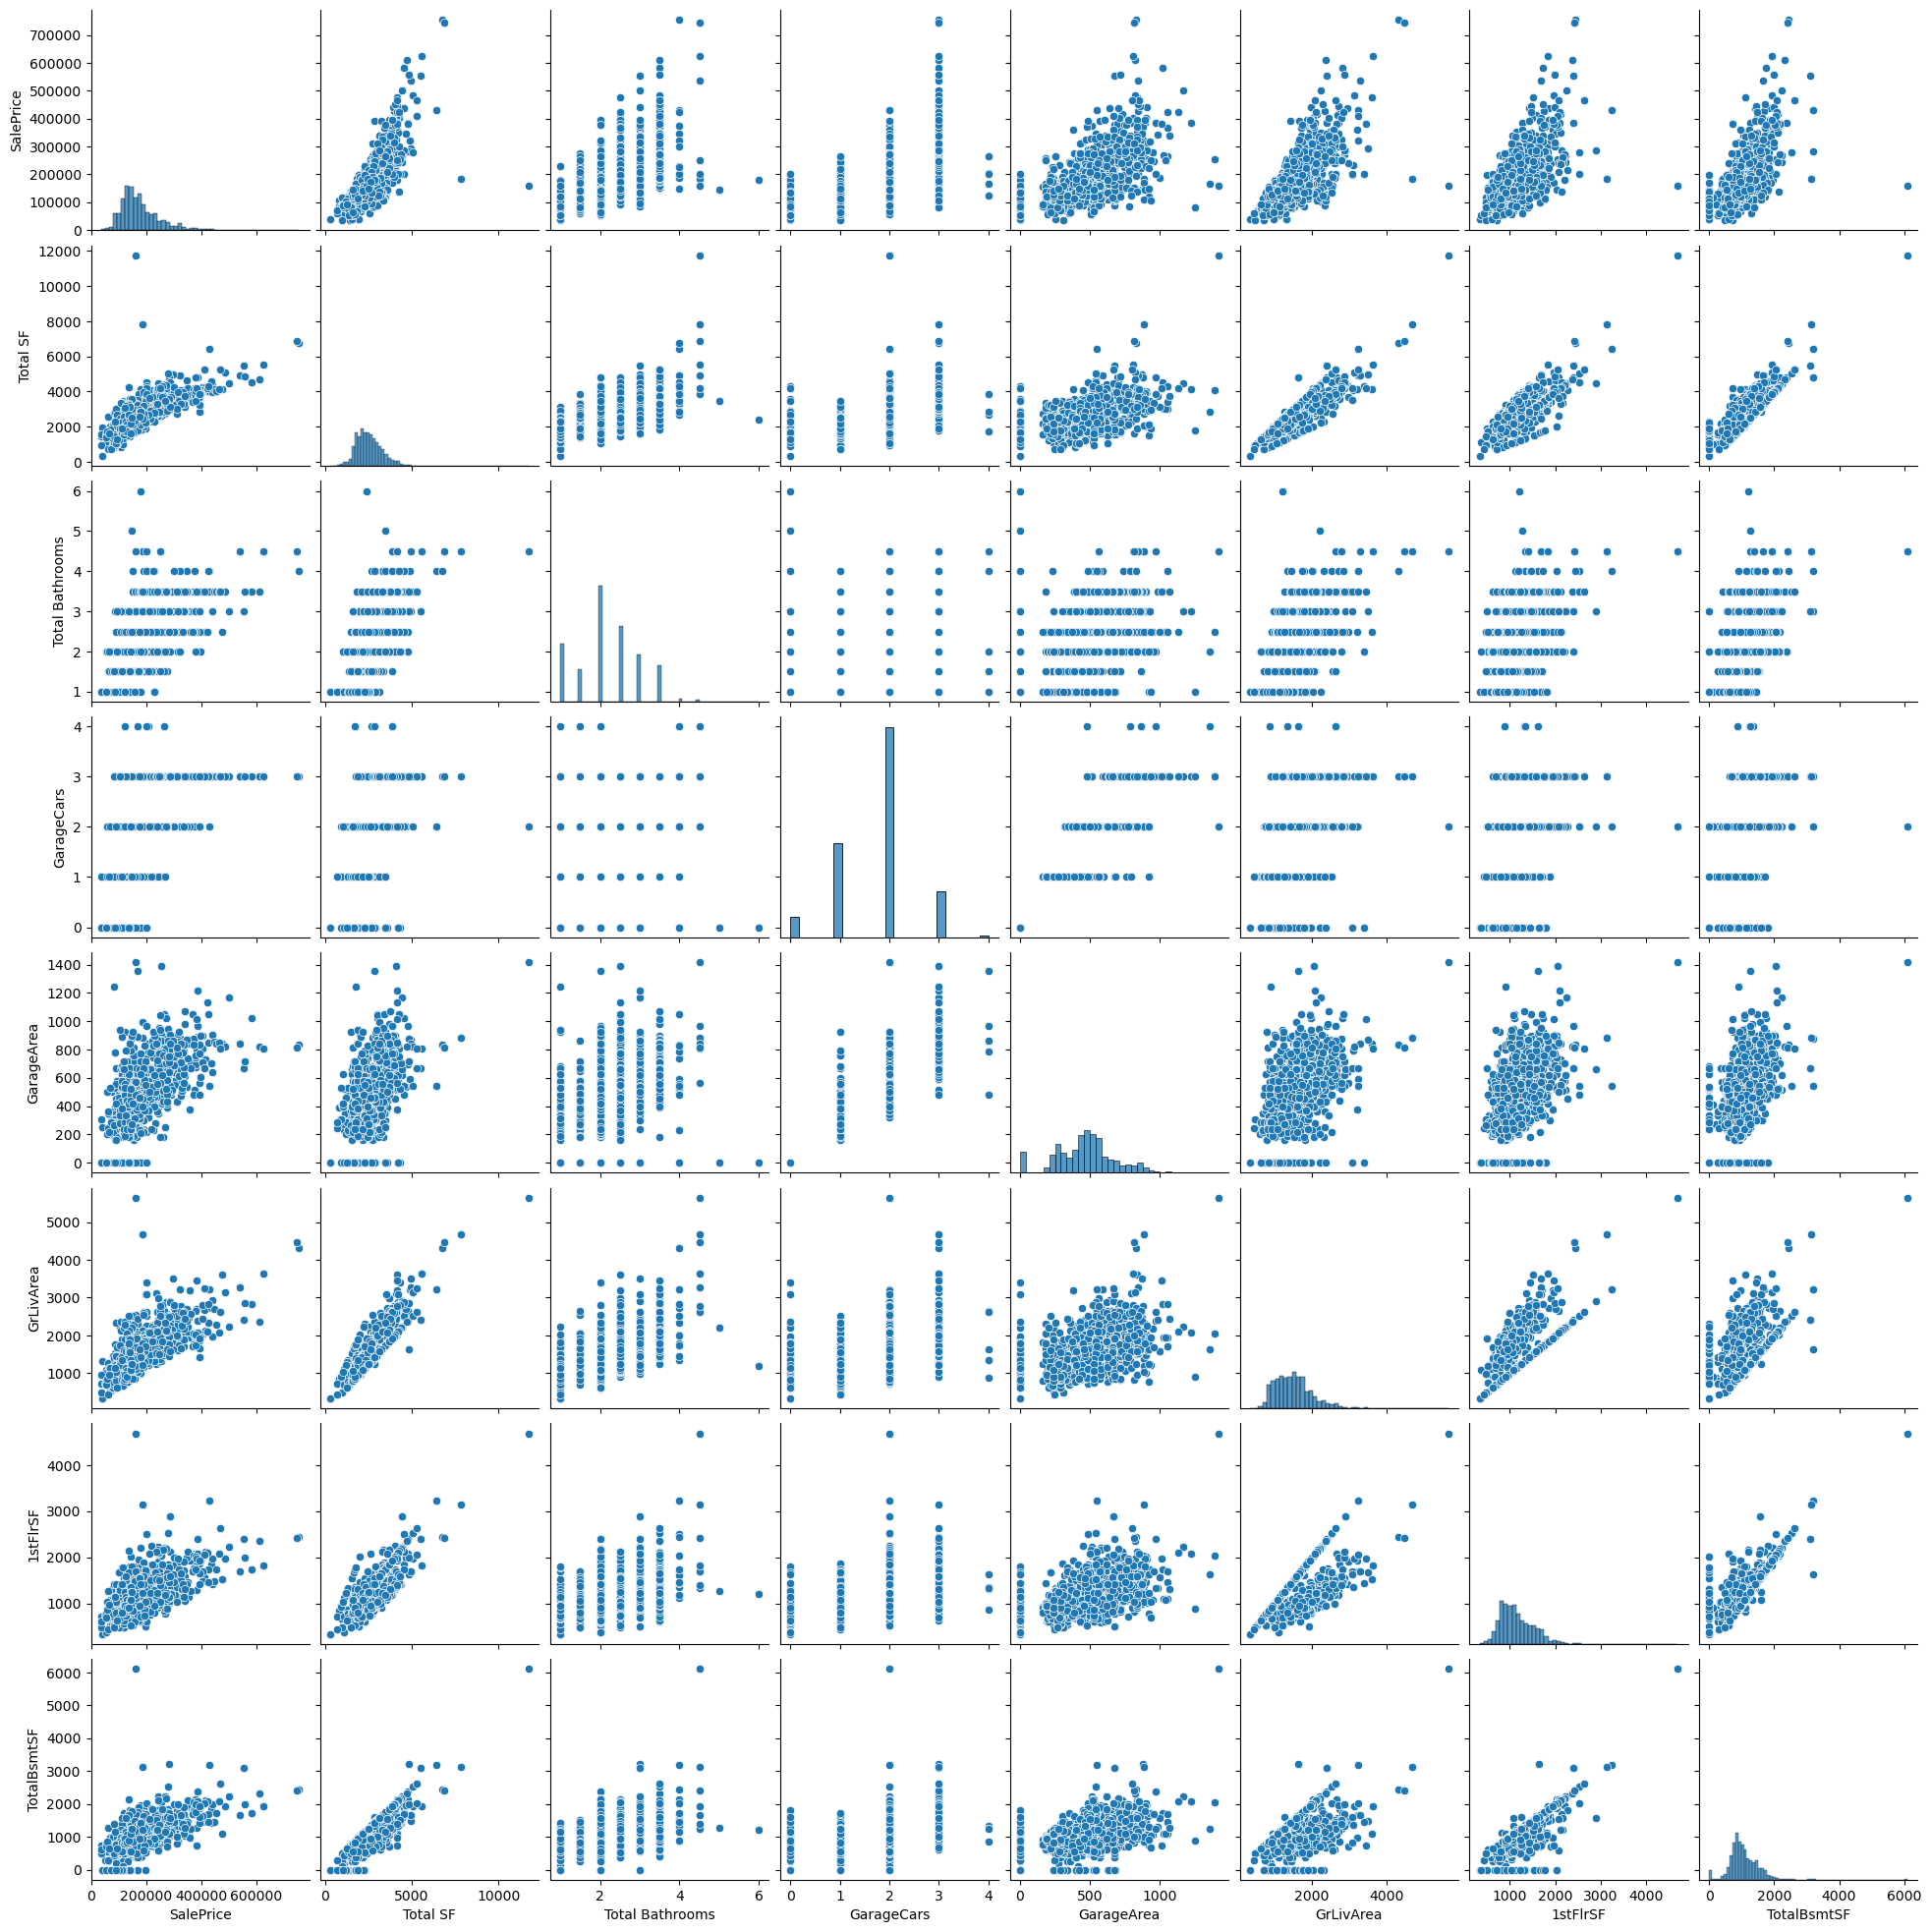

In [307]:
#lets verify the correlation of SalePrice with above variables using scatter plot
high_correlated=['SalePrice','Total SF','Total Bathrooms','GarageCars','GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']
sns.pairplot(house_price[high_correlated])
plt.show()

### Check of outliers and treatment

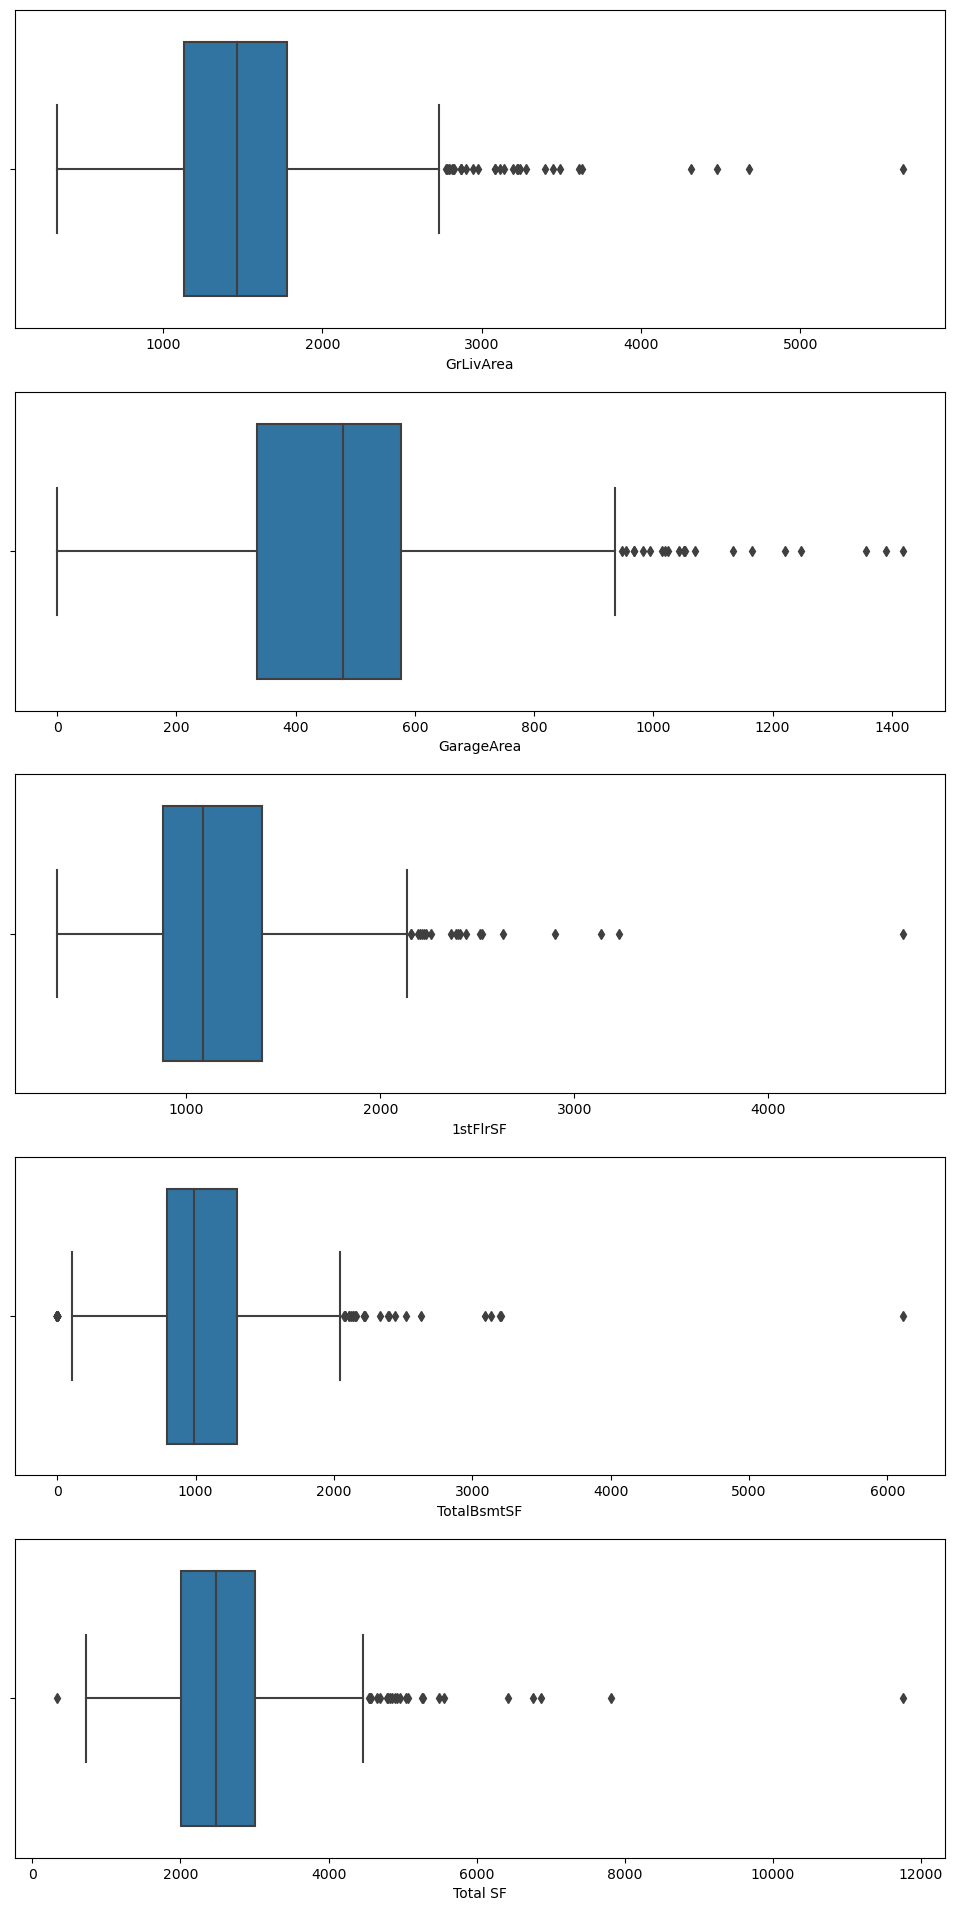

In [308]:
# check of outliers and treatment
plt.figure(figsize=(12,24))

plt.subplot(5,1,1)
a=sns.boxplot(x=house_price['GrLivArea'])

plt.subplot(5,1,2)
a=sns.boxplot(x=house_price['GarageArea'])

plt.subplot(5,1,3)
a=sns.boxplot(x=house_price['1stFlrSF'])

plt.subplot(5,1,4)
a=sns.boxplot(x=house_price['TotalBsmtSF'])

plt.subplot(5,1,5)
a=sns.boxplot(x=house_price['Total SF'])



In [309]:
# Now lets remove outliers
house_price=house_price[house_price['GrLivArea']<4000]
house_price=house_price[house_price['GarageArea']<1200]
house_price=house_price[house_price['1stFlrSF']<3000]
house_price=house_price[house_price['TotalBsmtSF']<3000]
house_price=house_price[house_price['Total SF']<6000]

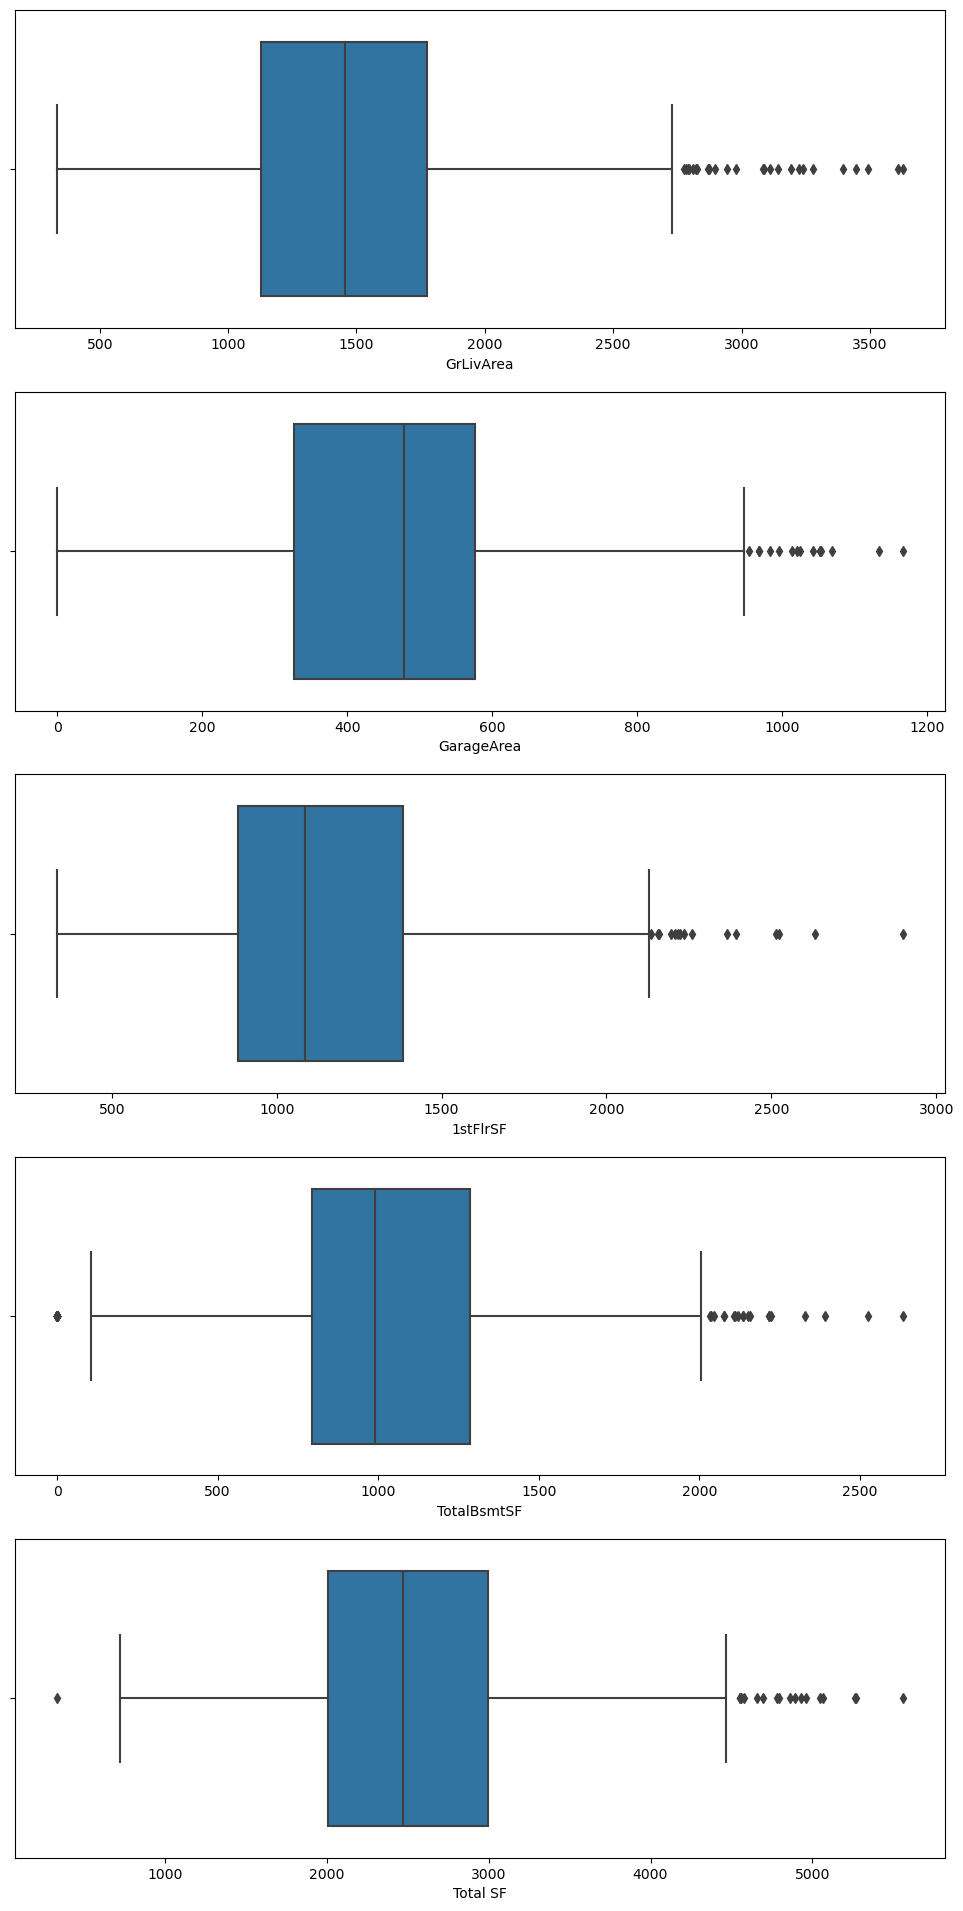

In [310]:
# recheck data
plt.figure(figsize=(12,24))

plt.subplot(5,1,1)
a=sns.boxplot(x=house_price['GrLivArea'])

plt.subplot(5,1,2)
a=sns.boxplot(x=house_price['GarageArea'])

plt.subplot(5,1,3)
a=sns.boxplot(x=house_price['1stFlrSF'])

plt.subplot(5,1,4)
a=sns.boxplot(x=house_price['TotalBsmtSF'])

plt.subplot(5,1,5)
a=sns.boxplot(x=house_price['Total SF'])



#### Checking Numerical Variables

In [311]:
numerical_data=house_price.select_dtypes(include=[np.number])
numerical_data.shape

(1449, 30)

In [312]:
num_vars=list(numerical_data.columns)

#### Checking Categorical data

In [313]:
categorical_data=house_price.select_dtypes(exclude=[np.number])
categorical_data.shape

(1449, 44)

In [314]:
categorical_vars=list(categorical_data.columns)

In [315]:
categorical_vars

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

#### Using Label Encoder to encode all categorical variables

In [316]:
label_encoder = preprocessing.LabelEncoder()

house_price['MSSubClass']= label_encoder.fit_transform(house_price['MSSubClass'])
house_price['MSZoning']= label_encoder.fit_transform(house_price['MSZoning'])
house_price['Street']= label_encoder.fit_transform(house_price['Street'])
house_price['LotShape']= label_encoder.fit_transform(house_price['LotShape'])
house_price['LandContour']= label_encoder.fit_transform(house_price['LandContour'])
house_price['Utilities']= label_encoder.fit_transform(house_price['Utilities'])
house_price['LotConfig']= label_encoder.fit_transform(house_price['LotConfig'])
house_price['LandSlope']= label_encoder.fit_transform(house_price['LandSlope'])
house_price['Neighborhood']= label_encoder.fit_transform(house_price['Neighborhood'])
house_price['Condition1']= label_encoder.fit_transform(house_price['Condition1'])
house_price['Condition2']= label_encoder.fit_transform(house_price['Condition2'])
house_price['BldgType']= label_encoder.fit_transform(house_price['BldgType'])
house_price['HouseStyle']= label_encoder.fit_transform(house_price['HouseStyle'])
house_price['OverallQual']= label_encoder.fit_transform(house_price['OverallQual'])
house_price['OverallCond']= label_encoder.fit_transform(house_price['OverallCond'])
house_price['YearBuilt']= label_encoder.fit_transform(house_price['YearBuilt'])
house_price['YearRemodAdd']= label_encoder.fit_transform(house_price['YearRemodAdd'])
house_price['RoofStyle']= label_encoder.fit_transform(house_price['RoofStyle'])
house_price['RoofMatl']= label_encoder.fit_transform(house_price['RoofMatl'])
house_price['Exterior1st']= label_encoder.fit_transform(house_price['Exterior1st'])
house_price['Exterior2nd']= label_encoder.fit_transform(house_price['Exterior2nd'])
house_price['ExterQual']= label_encoder.fit_transform(house_price['ExterQual'])
house_price['ExterCond']= label_encoder.fit_transform(house_price['ExterCond'])
house_price['Foundation']= label_encoder.fit_transform(house_price['Foundation'])
house_price['BsmtQual']= label_encoder.fit_transform(house_price['BsmtQual'])
house_price['BsmtCond']= label_encoder.fit_transform(house_price['BsmtCond'])
house_price['BsmtExposure']= label_encoder.fit_transform(house_price['BsmtExposure'])
house_price['BsmtFinType1']= label_encoder.fit_transform(house_price['BsmtFinType1'])
house_price['BsmtFinType2']= label_encoder.fit_transform(house_price['BsmtFinType2'])
house_price['Heating']= label_encoder.fit_transform(house_price['Heating'])
house_price['HeatingQC']= label_encoder.fit_transform(house_price['HeatingQC'])
house_price['CentralAir']= label_encoder.fit_transform(house_price['CentralAir'])
house_price['Electrical']= label_encoder.fit_transform(house_price['Electrical'])
house_price['KitchenQual']= label_encoder.fit_transform(house_price['KitchenQual'])
house_price['Functional']= label_encoder.fit_transform(house_price['Functional'])
house_price['GarageType']= label_encoder.fit_transform(house_price['GarageType'])
house_price['GarageFinish']= label_encoder.fit_transform(house_price['GarageFinish'])
house_price['GarageQual']= label_encoder.fit_transform(house_price['GarageQual'])
house_price['GarageCond']= label_encoder.fit_transform(house_price['GarageCond'])
house_price['PavedDrive']= label_encoder.fit_transform(house_price['PavedDrive'])
house_price['MoSold']= label_encoder.fit_transform(house_price['MoSold'])
house_price['YrSold']= label_encoder.fit_transform(house_price['YrSold'])
house_price['SaleType']= label_encoder.fit_transform(house_price['SaleType'])
house_price['SaleCondition']= label_encoder.fit_transform(house_price['SaleCondition'])

In [317]:
house_price.shape

(1449, 74)

In [318]:
house_price.describe()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total Bathrooms,Total SF
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.00000,1449.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,4.173913,3.031056,10418.690131,0.996549,1.945480,2.781228,0.00069,3.020014,0.062112,12.245687,...,15.057971,2.065562,43.432712,5.326432,1.815735,7.518288,3.768806,179533.404417,2.202553,2543.153209
std,4.161466,0.629392,9863.695471,0.058661,1.408511,0.702034,0.02627,1.621340,0.276134,6.028165,...,55.806463,35.468907,497.805767,2.700087,1.331151,1.551101,1.098577,75652.225719,0.777045,744.282916
min,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,1.000000,334.000000
25%,0.000000,3.000000,7500.000000,1.000000,0.000000,3.000000,0.00000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,8.000000,4.000000,129900.000000,2.000000,2008.000000
50%,4.000000,3.000000,9450.000000,1.000000,3.000000,3.000000,0.00000,4.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,5.000000,2.000000,8.000000,4.000000,162900.000000,2.000000,2468.000000
75%,6.000000,3.000000,11500.000000,1.000000,3.000000,3.000000,0.00000,4.000000,0.000000,17.000000,...,0.000000,0.000000,0.000000,7.000000,3.000000,8.000000,4.000000,213490.000000,2.500000,2996.000000
max,14.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.00000,4.000000,2.000000,24.000000,...,480.000000,738.000000,15500.000000,11.000000,4.000000,8.000000,5.000000,625000.000000,6.000000,5557.000000


## Splitting the Data into Train and Test

In [319]:
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [320]:
# Rescaling numerical variables
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [321]:
df_train[num_vars].describe()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Total Bathrooms,Total SF
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,...,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,0.042208,0.070951,0.200002,0.038491,0.242883,0.398059,0.310845,0.185855,0.008360,0.296115,...,0.108878,0.086960,0.040332,0.007577,0.030691,0.003306,0.003459,0.248000,0.240927,0.376921
std,0.050645,0.120197,0.198169,0.136330,0.189492,0.153805,0.144129,0.236339,0.077035,0.162703,...,0.145696,0.123301,0.111950,0.062554,0.112693,0.053045,0.037948,0.132936,0.155236,0.155141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028175,0.000000,0.000000,0.000000,0.094285,0.302317,0.200119,0.000000,0.000000,0.172154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161159,0.200000,0.265505
50%,0.037489,0.000000,0.176188,0.000000,0.202911,0.376757,0.283452,0.000000,0.000000,0.281602,...,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.218268,0.200000,0.358590
75%,0.047336,0.115747,0.326897,0.000000,0.347068,0.488986,0.400238,0.395490,0.000000,0.384017,...,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.304864,0.300000,0.472917
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='SalePrice', ylabel='Density'>

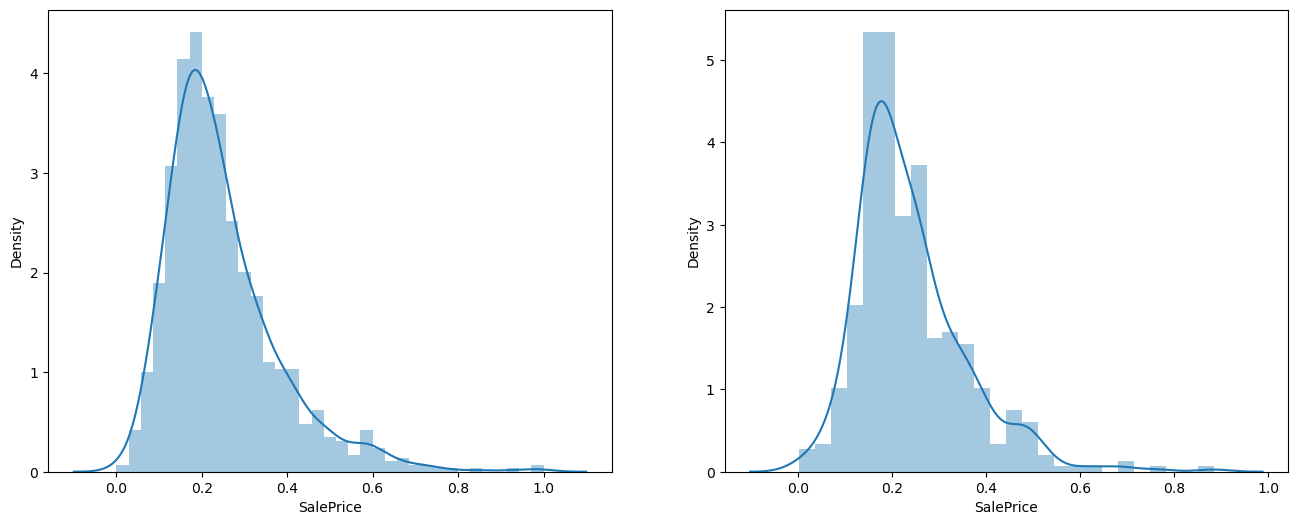

In [322]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

### Spliting the dependent and independent variable

In [323]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [324]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## Model Building and Evaluation

### Using RFE regression model to find the optimal number of feature

In [325]:
len(X_train.columns)

73

 - Total columns are 73
 - Lets build a RFE regression model with 40 features

In [326]:
# RFE model witl 40 features
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=40)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [327]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [328]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 10),
 ('MSZoning', True, 1),
 ('LotArea', True, 1),
 ('Street', True, 1),
 ('LotShape', False, 15),
 ('LandContour', False, 6),
 ('Utilities', True, 1),
 ('LotConfig', False, 30),
 ('LandSlope', False, 2),
 ('Neighborhood', False, 32),
 ('Condition1', False, 29),
 ('Condition2', False, 8),
 ('BldgType', True, 1),
 ('HouseStyle', False, 28),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 25),
 ('YearRemodAdd', False, 34),
 ('RoofStyle', False, 17),
 ('RoofMatl', True, 1),
 ('Exterior1st', False, 12),
 ('Exterior2nd', False, 13),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 27),
 ('Foundation', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 11),
 ('BsmtExposure', False, 5),
 ('BsmtFinType1', False, 16),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 22),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('Heating', False, 20),
 ('HeatingQC', False, 9),
 ('CentralAir', 

In [329]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Filter the train and test set for the RFE selected columns

In [330]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Lasso regression model

In [331]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8780466191788588
0.8509723313502024


In [332]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 0.019),
 ('MSZoning', -0.001),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('LotShape', -0.0),
 ('LandContour', -0.008),
 ('Utilities', 0.026),
 ('LotConfig', 0.006),
 ('LandSlope', 0.007),
 ('Neighborhood', 0.008),
 ('Condition1', -0.025),
 ('Condition2', 0.003),
 ('BldgType', -0.013),
 ('HouseStyle', 0.085),
 ('OverallQual', 0.0),
 ('OverallCond', -0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.108),
 ('Exterior2nd', -0.0),
 ('MasVnrArea', -0.0),
 ('ExterQual', -0.0),
 ('ExterCond', -0.014),
 ('Foundation', 0.0),
 ('BsmtQual', 0.005),
 ('BsmtCond', 0.021),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.044),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', -0.0),
 ('Electrical', 0.006),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.183)]

#### Improve the model with the optimal value of alpha using GridSearchCV

In [333]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [334]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020437,0.007179,0.001562,0.004685,0.0001,{'alpha': 0.0001},0.878712,0.895845,0.856525,0.868721,...,0.901948,0.900817,0.897939,0.897496,0.898156,0.901188,0.902003,0.898214,0.899815,0.001755
1,0.011889,0.006214,0.003776,0.006229,0.0010,{'alpha': 0.001},0.868924,0.896478,0.841229,0.845080,...,0.880683,0.880018,0.876078,0.875733,0.879276,0.882023,0.881502,0.876817,0.878639,0.002272
2,0.008170,0.007534,0.003130,0.006259,0.0100,{'alpha': 0.01},0.714699,0.744818,0.594076,0.578439,...,0.712017,0.710435,0.695672,0.704780,0.703746,0.710805,0.706794,0.704680,0.703756,0.006502
3,0.007880,0.007881,0.003119,0.006239,0.0500,{'alpha': 0.05},0.549151,0.583972,0.523790,0.483750,...,0.585297,0.586997,0.558713,0.562185,0.567144,0.580738,0.565871,0.576225,0.569125,0.011947
4,0.004718,0.006170,0.001750,0.004656,0.1000,{'alpha': 0.1},0.296695,0.300408,0.376060,0.340100,...,0.368802,0.373467,0.330130,0.339274,0.347465,0.358324,0.324900,0.356747,0.342796,0.020669


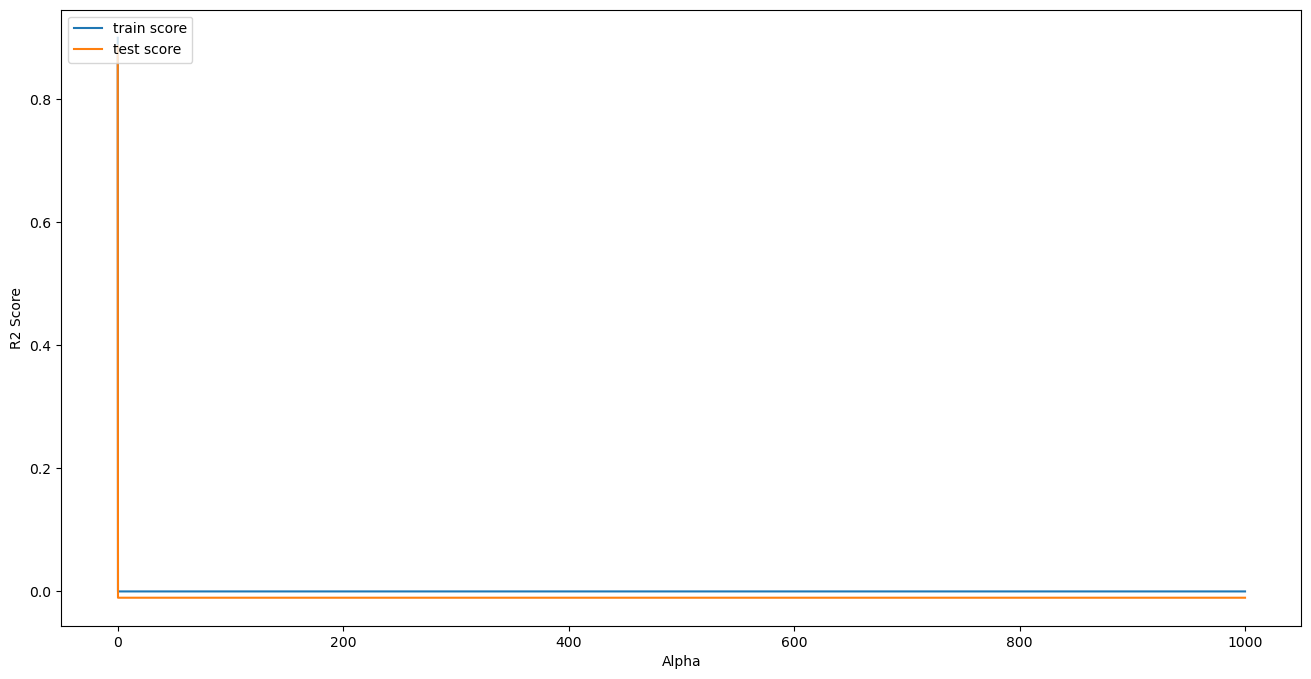

In [335]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'],loc='upper left')
plt.show()


In [336]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [359]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("R2 Score of Lasso Model on train data set:", r2_score(y_true=y_train,y_pred=y_train_pred))
print("R2 Score of Lasso Model on test data set:", r2_score(y_true=y_test,y_pred=y_test_pred))

R2 Score of Lasso Model on train data set: 0.8992813976336642
R2 Score of Lasso Model on test data set: 0.8610799341034835


In [352]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [353]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
20,Exterior1st,0.147596
40,2ndFlrSF,0.145204
2,LotArea,0.102753
13,HouseStyle,0.088614
9,Neighborhood,0.056936
29,BsmtFinType1,0.039178
25,Foundation,0.035226
18,RoofStyle,0.034562
28,BsmtExposure,0.018644
27,BsmtCond,0.018632


### Ridge regression model

In [340]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9005508496295911
0.859604185631877


#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [341]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [342]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003827,0.006039,0.002011,0.004647,0.0001,{'alpha': 0.0001},0.878178,0.876457,0.856634,0.869313,...,0.903162,0.901896,0.899274,0.898778,0.899703,0.902525,0.903494,0.899332,0.901181,0.001727
1,0.005690,0.007007,0.001573,0.004719,0.0010,{'alpha': 0.001},0.878183,0.876668,0.856642,0.869318,...,0.903162,0.901896,0.899274,0.898778,0.899703,0.902525,0.903494,0.899332,0.901181,0.001727
2,0.004675,0.007145,0.003446,0.005901,0.0100,{'alpha': 0.01},0.878227,0.878583,0.856715,0.869361,...,0.903162,0.901896,0.899273,0.898778,0.899702,0.902525,0.903493,0.899332,0.901180,0.001727
3,0.003591,0.005352,0.002004,0.003596,0.0500,{'alpha': 0.05},0.878405,0.884149,0.856931,0.869480,...,0.903155,0.901890,0.899264,0.898773,0.899695,0.902521,0.903479,0.899327,0.901168,0.001727
4,0.003146,0.004539,0.003182,0.004692,0.1000,{'alpha': 0.1},0.878601,0.887779,0.857079,0.869546,...,0.903138,0.901875,0.899238,0.898760,0.899675,0.902510,0.903452,0.899314,0.901143,0.001729


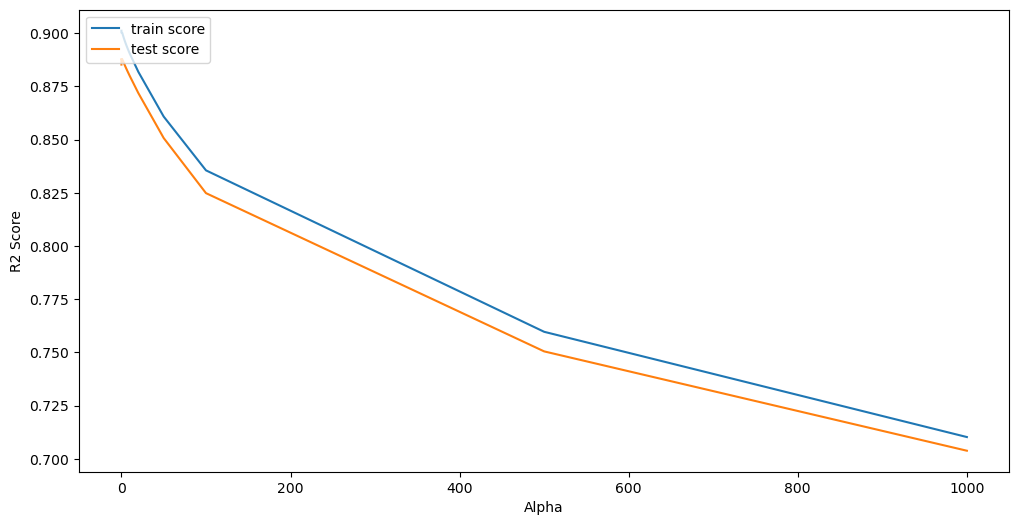

In [343]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_result_r['param_alpha']=cv_result_r['param_alpha'].astype('int32')

# plotting
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'],loc='upper left')
plt.show()


In [344]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.6}

In [364]:
ridge = Ridge(alpha = 0.6)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("R2 Score of Ridge Model on train data set:",r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print("R2 Score of Ridge Model on test data set:",r2_score(y_test,y_pred_test))


R2 Score of Ridge Model on train data set: 0.9001702140862855
R2 Score of Ridge Model on test data set: 0.8595824483759553


In [365]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [366]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,LotArea,0.157491
20,Exterior1st,0.108171
18,RoofStyle,0.097227
40,2ndFlrSF,0.089103
13,HouseStyle,0.068700
9,Neighborhood,0.067417
25,Foundation,0.062591
3,Street,0.055238
16,YearBuilt,0.043504
19,RoofMatl,0.038970


## Conclusion:
#### Here the lasso and Ridge regressions have same R2 Scores.
#### Since Lasso will penalize more on the dataset and can also help in feature elimination hence will consider that as the final model.

In [348]:
coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected=sum(coef!=0)
print('Lasso has selected {} variables'.format(var_selected))

Lasso has selected 33 variables


In [349]:
# As per Lasso Regression the predicted variables for housing prices
main_coef=pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
main_coef.sort_values(ascending=False)

LotArea          0.153609
GrLivArea        0.153348
Total SF         0.133359
BsmtFinSF1       0.087848
MasVnrArea       0.062660
TotRmsAbvGrd     0.049455
1stFlrSF         0.041088
Street           0.038178
GarageArea       0.038008
GarageCars       0.021185
3SsnPorch        0.000000
MSZoning        -0.003838
BldgType        -0.006265
BsmtQual        -0.010465
KitchenQual     -0.013867
EnclosedPorch   -0.014234
BsmtHalfBath    -0.015794
ExterQual       -0.025151
KitchenAbvGr    -0.052745
BedroomAbvGr    -0.058551
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

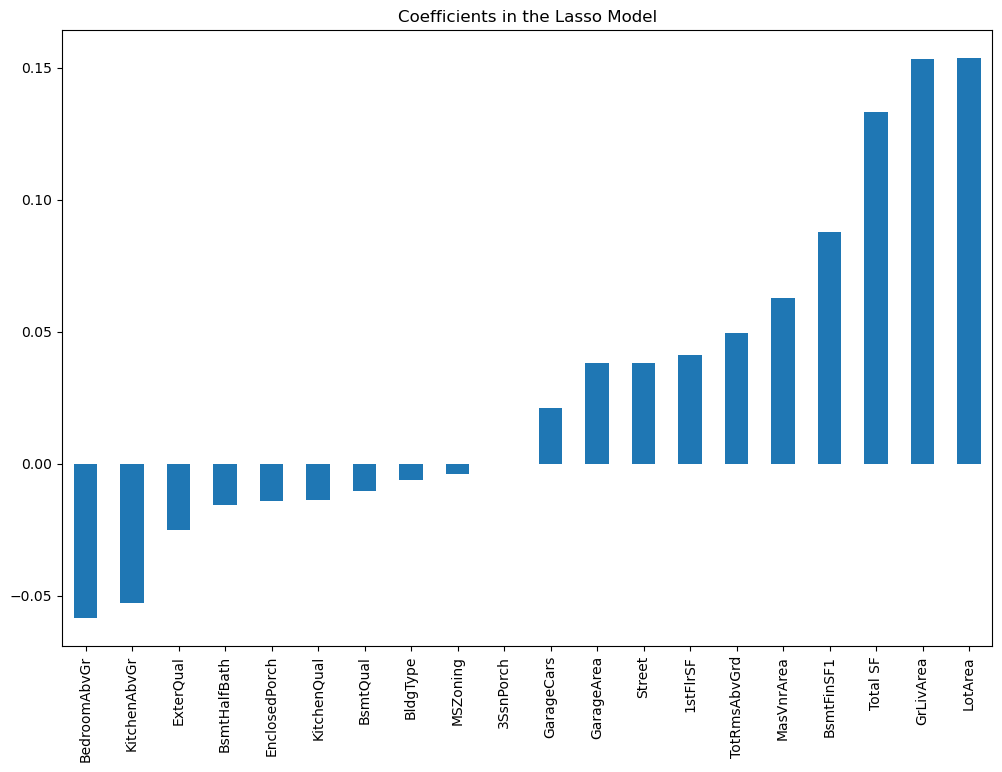

In [350]:
# Now plot the final variables
plt.figure(figsize=(12,8))
main_coef.plot(kind="bar")
plt.title("Coefficients in the Lasso Model")

### Submitted by Vivek Goswami as part of Upgrad Assignment

**** End of Document ****